# Import Dependencies

In [1]:
# For clean-up & plot

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# For tables & chart to show in PDF download

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

# For hyperlinks to show in PDF download

from IPython.core.display import HTML

# Load Data

In [2]:
nyc_data = "RawData/nyc_data.csv"
global_data = "RawData/global_data.csv"

nyc = pd.read_csv(nyc_data)
global_df = pd.read_csv(global_data)

# Clean Data

## City Data

In [3]:
display(nyc.head())

,year,city,country,avg_temp
0,1743,New York,United States,3.26
1,1744,New York,United States,11.66
2,1745,New York,United States,1.13
3,1746,New York,United States,NaN
4,1747,New York,United States,NaN


In [4]:
# Drop Null Values

nyc.dropna(inplace=True)


# Update Column Names

nyc_update = nyc.rename(columns={"year": 'Year', 
                             "city": 'City', 
                             "country": 'Country', 
                             "avg_temp": 'NYC Temp. (C°)'})

# Reset Index

nyc_df = nyc_update.reset_index(drop=True)

display(nyc_df.head())

,Year,City,Country,NYC Temp. (C°)
0,1743,New York,United States,3.26
1,1744,New York,United States,11.66
2,1745,New York,United States,1.13
3,1750,New York,United States,10.07
4,1751,New York,United States,10.79


## Global Data

In [5]:
display(global_df.head())

,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47


In [6]:
# Check for null values

global_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   year      266 non-null    int64  
 1   avg_temp  266 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.3 KB


In [7]:
# Update Column Names

glo_df = global_df.rename(columns={"year": 'Year', 
                                     "avg_temp": 'Global Temp. (C°)'})

display(glo_df.head())

,Year,Global Temp. (C°)
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47


## Merge Tables

In [8]:
# Merge

merge_df = pd.merge(nyc_df, glo_df, on="Year", how="left")

# Drop Irrelevant Columns

data_df = merge_df.drop(columns=['City', 'Country'])

display(data_df.head())

,Year,NYC Temp. (C°),Global Temp. (C°)
0,1743,3.26,NaN
1,1744,11.66,NaN
2,1745,1.13,NaN
3,1750,10.07,8.72
4,1751,10.79,7.98


In [9]:
# Drop Null Values

data_df.dropna(inplace=True)

# Reset Index 

trends = data_df.reset_index(drop=True)

# Drop rows to only display 1913 - 2013 (100-year period)

trends_df = trends.drop(trends.index[range(162)])

display(trends_df.head())

,Year,NYC Temp. (C°),Global Temp. (C°)
162,1913,10.76,8.30
163,1914,9.02,8.59
164,1915,9.85,8.59
165,1916,9.10,8.23
166,1917,8.24,8.02


# Find the Moving Average

In [10]:
# Calculate the moving average for NYC & Global

nyc_ma = trends_df["NYC Temp. (C°)"].rolling(15, min_periods=1).mean()
global_ma = trends_df["Global Temp. (C°)"].rolling(15, min_periods=1).mean()
year_col = trends_df["Year"]


# Add values to a new DataFrame

new_df = pd.DataFrame({'NYC M.A. (C°)': nyc_ma,
                       'Global M.A. (C°)': global_ma,
                      'Year': year_col})

display(new_df.head())

,NYC M.A. (C°),Global M.A. (C°),Year
162,10.760000,8.300000,1913
163,9.890000,8.445000,1914
164,9.876667,8.493333,1915
165,9.682500,8.427500,1916
166,9.394000,8.346000,1917


In [11]:
# Round values to 2 decimal points

round_df = new_df.round({'NYC M.A. (C°)': 2, 
                         'Global M.A. (C°)': 2})

display(round_df.head())

,NYC M.A. (C°),Global M.A. (C°),Year
162,10.76,8.30,1913
163,9.89,8.44,1914
164,9.88,8.49,1915
165,9.68,8.43,1916
166,9.39,8.35,1917


In [12]:
# Set 'Year' column as the index 

final_df = round_df.set_index('Year')

# Download dataframe as a .csv file

final_df.to_csv("../project_1/Output/FinalDataset.csv", index=True)

display(final_df.head())

,NYC M.A. (C°),Global M.A. (C°)
Year,,
1913,10.76,8.30
1914,9.89,8.44
1915,9.88,8.49
1916,9.68,8.43
1917,9.39,8.35


# Calculate Descriptive Statistics

## Mean

In [13]:
mean = final_df.mean()

print(mean)

NYC M.A. (C°)       10.018515
Global M.A. (C°)     8.729307
dtype: float64


## Median

In [14]:
median = final_df.median()

print(median)

NYC M.A. (C°)       9.97
Global M.A. (C°)    8.65
dtype: float64


## Mode

In [15]:
mode = final_df.mode()

# Convert column names to index

mode_2 = mode.transpose()

# Convert '0' to a string & rename

mode_3 = mode_2.rename(columns = {0:'Mode'}, inplace=True)

mode_4 = pd.DataFrame(mode_3, columns=['Mode'])

# Convert DataFrame to a float64

mode_df = mode_2["Mode"].astype(str).astype('float64')

print(mode_df)

NYC M.A. (C°)       9.85
Global M.A. (C°)    8.65
Name: Mode, dtype: float64


## Minimum

In [16]:
df_min = final_df.min()

print(df_min)

NYC M.A. (C°)       9.39
Global M.A. (C°)    8.30
dtype: float64


## Maximum

In [17]:
df_max = final_df.max()

print(df_max)

NYC M.A. (C°)       10.93
Global M.A. (C°)     9.50
dtype: float64


## Range

In [18]:
df_range = df_max - df_min

print(df_range)

NYC M.A. (C°)       1.54
Global M.A. (C°)    1.20
dtype: float64


## Skewness

In [19]:
skew = final_df.skew()

print(skew)

NYC M.A. (C°)       0.547463
Global M.A. (C°)    1.069131
dtype: float64


## Standard Deviation

In [20]:
stan_dev = final_df.std()

print(stan_dev)

NYC M.A. (C°)       0.329938
Global M.A. (C°)    0.293381
dtype: float64


## Add to a DataFrame

In [21]:
stats = pd.DataFrame({'Mean': mean, 
                      'Median': median, 
                      'Mode': mode_df,
                      'Min': df_min, 
                      'Max': df_max, 
                      'Range': df_range, 
                      'Skew': skew, 
                      'Standard Deviation': stan_dev})

stats_df = stats.round({'Mean': 2, 
                        'Median': 2, 
                        'Mode': 2, 
                        'Min': 2, 
                        'Max': 2, 
                        'Range': 2, 
                        'Skew': 2, 
                        'Standard Deviation': 2})

# Visualize The Data

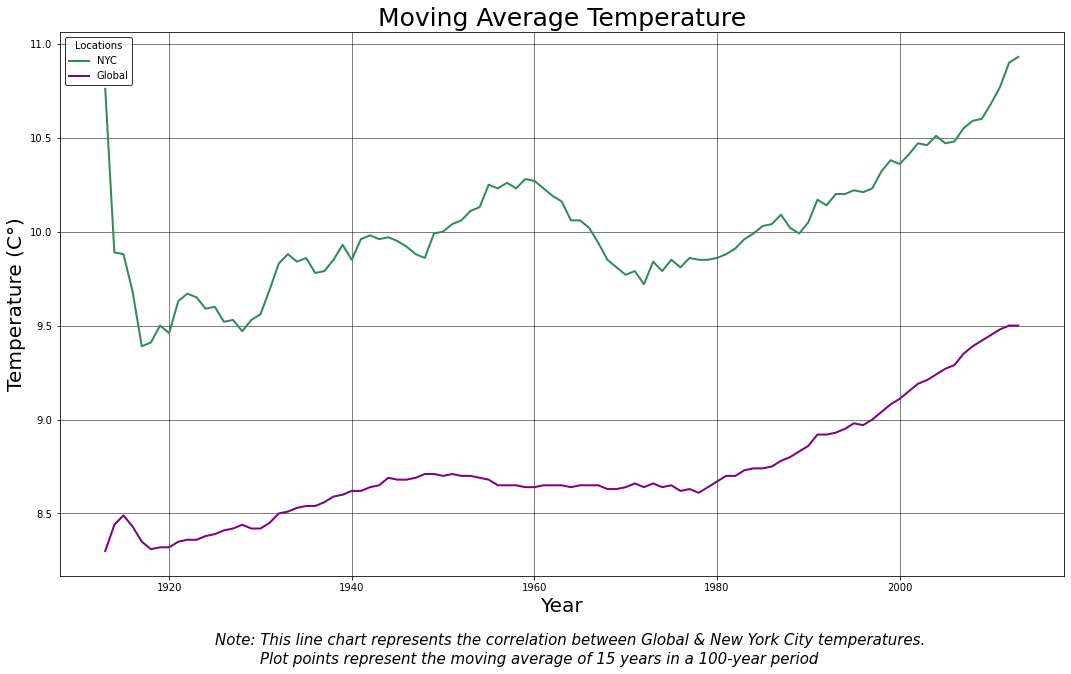

In [22]:
# Build Line Chart


## Plot the chart
final_df.plot(linestyle='-', 
              color=['seagreen', 'purple'], 
              figsize=(18, 10),  
              linewidth=2)

## Add chart properties

### Labels

plt.title('Moving Average Temperature', fontsize=25)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Temperature (C°)', fontsize=20)

### Add a blurb describing the chart's purpose

plt.text(1925, 7.8, 
         "Note: This line chart represents the correlation between Global & New York City temperatures.", 
         fontsize=15, 
         style='italic')
plt.text(1930, 7.7, 
         "Plot points represent the moving average of 15 years in a 100-year period", 
         fontsize=15, 
         style='italic')

### Grid

plt.grid(linewidth=0.5, color='black')
plt.xticks()
plt.yticks()


### Legend
legend = plt.legend(title = "Locations", 
                    frameon=True, 
                    edgecolor='black', 
                    labels=['NYC', 'Global'])


# Save Chart
plt.savefig("../project_1/Output/TrendsPlot.png", bbox_inches='tight')

plt.show()

# Observations

## Statistics

In [23]:
display(stats_df)

,Mean,Median,Mode,Min,Max,Range,Skew,Standard Deviation
NYC M.A. (C°),10.02,9.97,9.85,9.39,10.93,1.54,0.55,0.33
Global M.A. (C°),8.73,8.65,8.65,8.30,9.50,1.20,1.07,0.29


## Is your city hotter or cooler on average compared to the global average? Has the difference been consistent over time?

#### - New York City, on average, is consistently hotter than the global temperature.

## How do the changes in your city’s temperatures over time compare to the changes in the global average?

#### - New York City's average temperatures fluctuate from hotter temperatures (10.7° C), to cooler ones (9.4.6° C). Then the temperatures gradually increase to 10.9 - 11° C.

#### - The Global average temperatures exhibit the same behaviors observed in New York City's, except, they fluctuate in cooler temperatures (7.5 - 8.6° C). Then they gradually increase to 9.5° C.

## What does the overall trend look like? Is the world getting hotter or cooler? Has the trend been consistent over the last few hundred years?

#### - The world is getting hotter over the progressing years. This has been a consistent, gradual increase.

# Citations

## To Review the Data

#### Clean-Up: [Pandas Documentation](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html)

#### Moving Average: [Rolling Method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html)

## To Plot the Chart

#### Line Graph: [Python Graph Gallery](https://www.python-graph-gallery.com/121-line-chart-customization)

## To Export to PDF

#### How-To: [Open Library](https://ecampusontario.pressbooks.pub/rwsnotes/back-matter/getting-started-with-jupyter-notebooks/)

#### Download Link: [MacTex](http://tug.org/mactex/mactex-download.html)

#### To Embed Hyperlinks: [StackOverflow](https://stackoverflow.com/questions/25698448/how-to-embed-html-into-ipython-output)